In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('listings.csv')
df.columns
df.shape

(637, 300)

<Figure size 5000x5000 with 0 Axes>

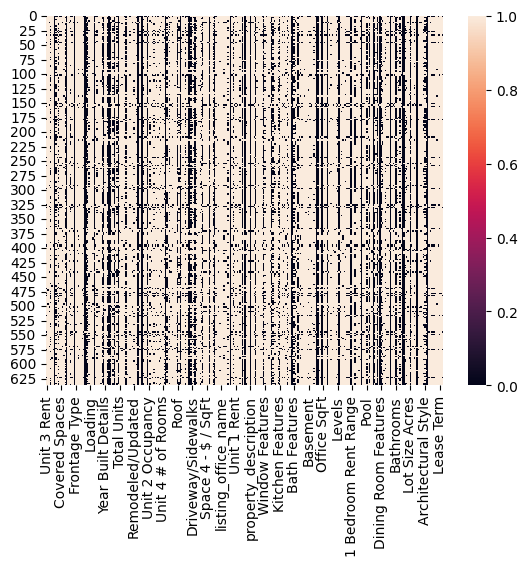

<Figure size 5000x5000 with 0 Axes>

In [5]:
import seaborn as sns
sns.heatmap(df.isna())

plt.figure(figsize=(50,50))

In [6]:
df.head()

,Unit 3 Rent,Listing Co Agent Full Name,Location,Patio And Porch Features,Vegetation,Unit 4 Lease Term,Commission To Buyer Broker,Directions to Property,2 Bedroom Annual Occupancy,Master Bathroom Features,...,Yard Size,# of 3 Bedroom Units,Unit 3 Full Baths,Unit 4 Full Baths,4 Bedroom Rent Range,Distance To Gas,Unit 3 Occupancy,Lease Term,Other Unit(s),Unit 1 Type
0,3200.0,NaN,NaN,NaN,NaN,NaN,2.5%,"Laguna, between Greenwich/Filbert.",0.0,NaN,...,NaN,0.0,1.0,0.0,NaN,NaN,Vacant,NaN,NaN,Flat
1,3200.0,NaN,NaN,NaN,NaN,NaN,2.5%,"Laguna, between Greenwich/Filbert.",0.0,NaN,...,NaN,0.0,1.0,0.0,NaN,NaN,Vacant,NaN,NaN,Flat
2,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Deck(s),NaN,NaN,2.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for i in df.columns:
    print(i)

Unit 3 Rent
Listing Co Agent Full Name
Location
Patio And Porch Features
Vegetation
Unit 4 Lease Term
Commission To Buyer Broker
Directions to Property
2 Bedroom Annual Occupancy
Master Bathroom Features
# of Guest Space(s)
Covered Spaces
Parking Clearance Height (ft)
Distance To Sewer
Fireplace Features
Association Fee
Body Type
Space 1 - $ / SqFt
Subdistrict
Unit 3 Partial Baths
Tenant SqFt
highlights_text
Frontage Type
# of Restrooms
Zoning Description
Unit 2 Lease Term
Skirt
Distance To Water
# Commercial Units
listing_detail_label
Possible Bedrooms
Cooling
Distance To Shopping
Loading
Rentable
Road Frontage Type
Association
# of 4 Bedrooms Occupied
Special Listing Conditions
Minimum Available SqFt
Space 2 - # Yr Lease
Height Limit
Area/District
# of Fireplaces
Year Built Details
2nd Unit Type
Foundation
Stories
Heating
Space 4 - # Yr Lease
Senior Community
Parking Fee $
Space 3 - # Yr Lease
Property Condition
Water Source
Total Units
2nd Unit Kitchen
2nd Unit Description
Unit 4 De

In [9]:
df['Directions to Property'].head()

0    Laguna, between Greenwich/Filbert.
1    Laguna, between Greenwich/Filbert.
2                                   NaN
3                                   NaN
4                                   NaN
Name: Directions to Property, dtype: object